In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Посмотрим на данные:

<div style="margin-top: 30px;">
<table style="width: 80%; font-size: 16px; padding: 0.3em; border-collapse: collapse; margin: 0px auto; border: 1px solid #b3b3b3;">
<tbody>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">client_id</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">идентификатор клиента</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">education</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">уровень образования</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">sex</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">пол заёмщика</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">age</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">возраст заёмщика</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">car</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">флаг наличия автомобиля</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">car_type</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">флаг автомобиля-иномарки</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">decline_app_cnt</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">количество отказанных прошлых заявок</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">good_work</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">флаг наличия «хорошей» работы</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">bki_request_cnt</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">количество запросов в БКИ</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">home_address</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">категоризатор домашнего адреса</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">work_address</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">категоризатор рабочего адреса</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">income</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">доход заёмщика</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">foreign_passport</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">наличие загранпаспорта</td>
</tr>
<tr>
<td style="width: 34.3096%; border: 1px solid #b3b3b3; padding: 0.3em;">default</td>
<td style="width: 65.5509%; border: 1px solid #b3b3b3; padding: 0.3em;">наличие дефолта</td>
</tr>
</tbody>
</table>
</div>

In [3]:
df = pd.read_csv(
        "./data/train.csv", encoding='ISO-8859-1', low_memory=False)

In [4]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

Постройте диаграмму для переменной default. Каких клиентов у банка больше?

<AxesSubplot:xlabel='default', ylabel='count'>

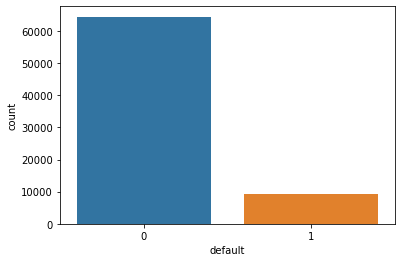

In [5]:
sns.countplot(x='default', data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


Посмотрим на количество пропусков:

In [7]:
df.isna().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

В данных о клиентах присутствуют переменные всех типов, не все имеют числовую запись, а также есть пропущенные значения. Значит, нам необходима предварительная очистка данных.

Как мы видим, пропуски встречаются только в информации об образовании клиентов. Посмотрим на признак ближе:

<AxesSubplot:>

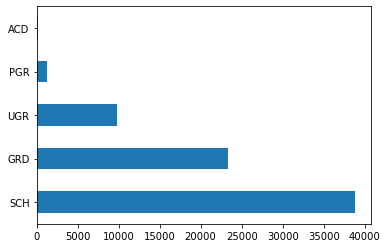

In [8]:
df['education'].value_counts().plot.barh()

А теперь самостоятельно заполните пропуски в поле 'education' любыми известными вам методами.

In [9]:
df['education'].fillna('SCH', inplace=True)

Полученные признаки сгруппируем в три категории по типу их обработки (категориальные, бинарные и числовые) для дальнейшего удобного анализа. Разнесите недостающие признаки в соответствующие категории.

In [10]:
# бинарные переменные
bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

# категориальные переменные
cat_cols = ['education', 'home_address', 'work_address']

# числовые переменные
num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']

In [11]:
# n = len(num_cols)
# rows = int(np.round(n / 2))

# fig, axes = plt.subplots(rows, 2, figsize=(15, 10), sharex=True, sharey=True)

# for i in range(0, n):
#     ax_index = np.unravel_index(i, (rows, 2))    
#     col = num_cols[i]
#     axes[ax_index].set_title(col)
#     sns.histplot(data=df, y=col, ax=axes[ax_index], bins=30)


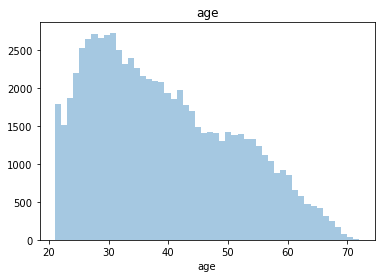

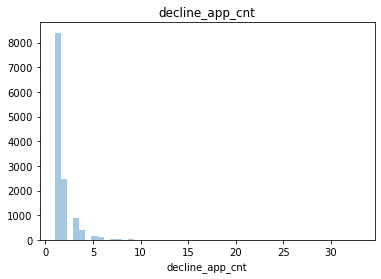

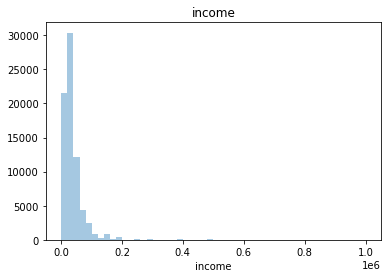

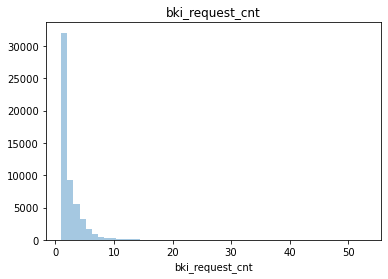

In [12]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde=False, rug=False)
    plt.title(i)
    plt.show()

> Идея на заметку! Некоторые переменные стали менее смещёнными. Такой принцип можно применить перед построением модели и сравнить значение метрики.

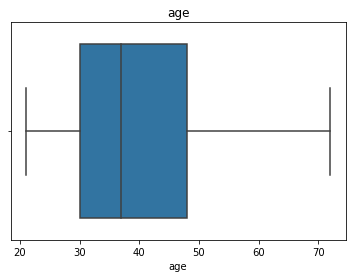

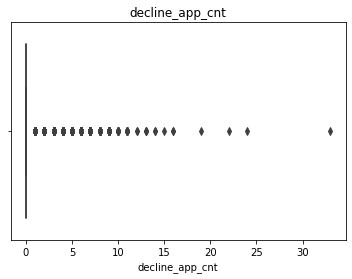

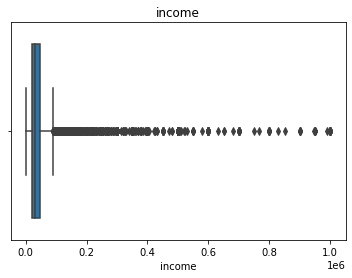

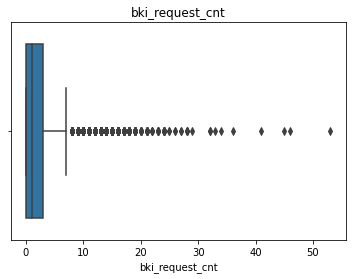

In [13]:
for i in num_cols:
    plt.figure()
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

#  Оценка корреляций

Вы помните, что сильная корреляция между переменными вредна для линейных моделей из-за неустойчивости полученных оценок.

Как работать с корреляцией? 

- Способ 1. Отобрать низко коррелируемые признаки .

- Способ 2. Использовать регуляризацию, чтобы в процессе обучения штрафовать модель за сложность, выраженную в величине весов, при этом задавая величину штрафа. Изменяя эту величину, я смогу контролировать переобучение и устойчивость модели. 

Но начнём с простого...

Оценим корреляцию Пирсона для непрерывных переменных по формуле:

$$
r_{xy} = \frac{\sum (x_{i} - \overline{x}) * (y_{i} - \overline{y})}{\sqrt{\sum (x_{i} - \overline{x})^{2} * \sum (y_{i} - \overline{y})^{2}}}
$$

<AxesSubplot:>

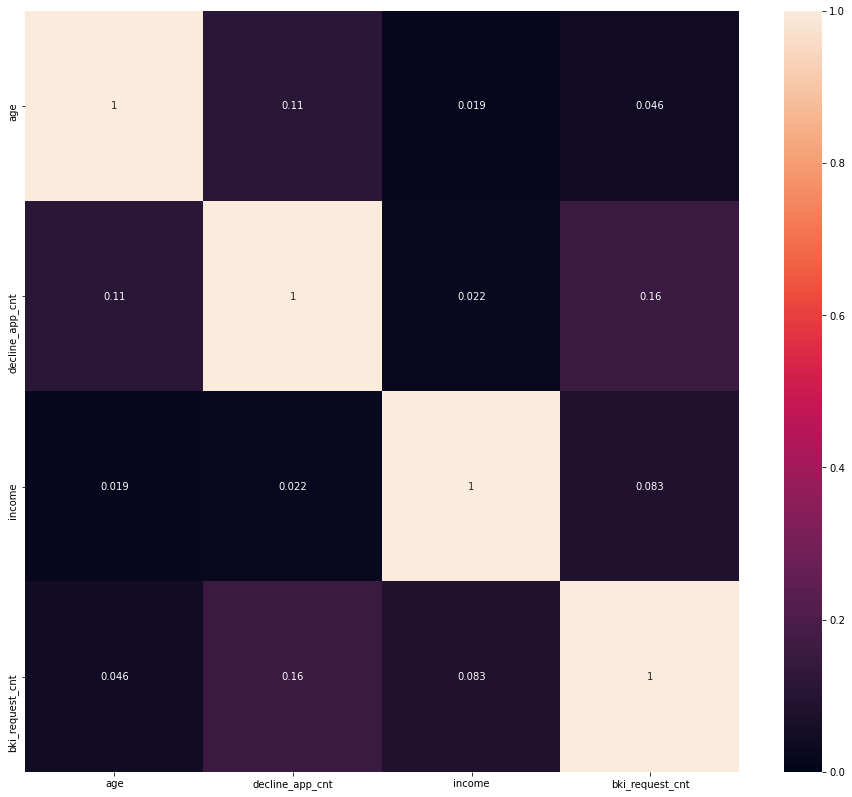

In [14]:
plt.figure(figsize=(16, 14))
sns.heatmap(df[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

Как мы видим, взаимосвязь пар числовых признаков по Пирсону слабая. Максимальный коэффициент -0.127734 и 0.125163. Это очень здорово для нашей линейной модели!

# Значимость непрерывных переменных

Для оценки значимости числовых переменных будем использовать функцию [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) из библиотеки sklearn. 

Возможности модуля [sklearn.feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) могут быть использованы не только для выбора важных признаков, но и для уменьшения размерности, улучшения предсказательной силы моделей, либо для повышения их производительности на очень многомерных наборах данных.

В основе метода оценки значимости переменных лежит [однофакторный дисперсионный анализ](https://lit-review.ru/biostatistika/dispersionnyjj-analiz-anova/) (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t). 

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели.

<AxesSubplot:>

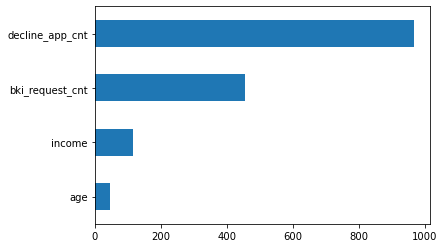

In [15]:
imp_num = pd.Series(f_classif(df[num_cols], df['default'])[0], index=num_cols)
imp_num.sort_values(inplace=True)
imp_num.plot(kind='barh')

# Категориальные переменные

Самый простой способ — отобразить каждое значение категории в уникальное число. Например, в поле `sex` значение `sex = female` преобразовать в `0`, а `sex = male` — в `1`. Эту простую операцию приходится делать достаточно часто, поэтому в модуле [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) именно для этой задачи реализован класс [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder).

Метод `fit` этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод `transform` непосредственно преобразует значения в числа. После `fit` у `label_encoder` будет доступно поле `classes_`, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

In [16]:
label_encoder = LabelEncoder()

mapped_sex = pd.Series(label_encoder.fit_transform(df['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [17]:
for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])

Сработало! Теперь всегда можно обратиться к `classes_` , если забыли, что закодировали. Применим `LabelEncoder` ко всему набору бинарных переменных.

Почему мы применили метод только к бинарным переменным? Единственным минусом использования кодирования при помощи LabelEncoder() является то, что при использовании этого подхода мы должны быть уверены, что признак не может принимать неизвестных ранее значений. 

→ Что произойдет, если у нас появятся данные с другими категориями? LabelEncoder будет ругаться, что не знает новую категорию. 

Например, если у нас появится новый пол (помимо женского и мужского), признак sex придется обрабатывать по-другому.

Исходя из описания, наши признаки строго бинарные (принимают только два значения) и сюрпризов (новых неизвестных значений) быть не должно.

## ЗНАЧИМОСТЬ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

Для оценки значимости категориальных и бинарных переменных будем использовать функцию mutual_info_classif из библиотеки sklearn. Данная функция опирается на непараметрические методы, основанные на оценке энтропии в группах категориальных переменных.

<AxesSubplot:>

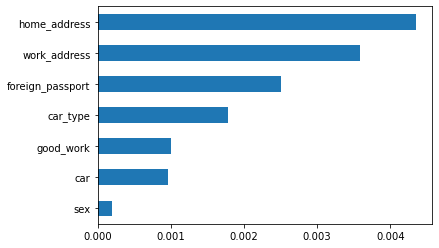

In [18]:
from sklearn.feature_selection import mutual_info_classif

cat_cols_without_education = [c for c in cat_cols if c != 'education']

imp_cat = pd.Series(mutual_info_classif(
    df[bin_cols + cat_cols_without_education],
    df['default'],
    discrete_features=True
), index=bin_cols + cat_cols_without_education)

imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')

# Подготовка данных к машинному обучению

Перед обучением регрессии нам следует стандартизировать числовые признаки, а также воспользоваться dummy-кодированием для категориальных переменных, то есть создать отдельную бинарную переменную для каждой категории.

Как вы уже поняли, LabelEncoder не совсем подходит для признаков с двумя и большим количеством категорий. Для того, чтобы мы смогли применять линейные модели на таких данных, нам необходим другой метод, который называется One-Hot Encoding. Смысл его точно такой же, как у dummy-кодирования.

Предположим, что некоторый признак может принимать пять разных значений. В этом случае One Hot Encoding подразумевает создание пяти новых признаков, все из которых равны нулю, за исключением одного. На позицию, соответствующую численному значению признака, мы помещаем 1.

Эта техника реализована в sklearn.preprocessing в классе OneHotEncoder. По умолчанию OneHotEncoder преобразует данные в разреженную матрицу, чтобы не расходовать память на хранение многочисленных нулей.

## Стандартизируем числовые переменные:

In [19]:
X_num = StandardScaler().fit_transform(df[num_cols].values)

## Стандартизируем категориальные переменные:

In [20]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [21]:
X_cat[0]

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.])

И объединим стандартизованные числовые, бинарные и закодированные категориальные переменные в одно признаковое пространство, разделив при этом признаки и целевую переменную.

In [22]:
X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

Подготовка признаков для модели завершена.

Разделим данные для обучения следующим образом:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

Обучите модель на стандартных настройках [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [24]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

# Оценка качества модели

В качестве методов оценки прогностической способности модели вы решаете использовать ROC-анализ.

Вы прекрасно помните из модуля по Классификации, что классификатор имеет параметр порог отсечения. Изменяя его значение, мы получаем то или иное разбиение на два класса — класс с положительными исходами и класс с отрицательными исходами.

![dst_score](./img/dst-score.png)

В нашем примере положительным исходом будет наличие дефолта у заемщика, отрицательным — отсутствие дефолта.

<div style="margin: 20px 0px;">
<table style="width: 60%; font-size: 16px; padding: 0.3em; border-collapse: collapse; margin: 0px auto; border: 1px solid #b0b0b0;">
<tbody>
<tr>
<td rowspan="2" style="width: 28.9473%; text-align: center; background-color: #ffffff; border: 1px solid #b0b0b0; padding: 0.3em;">Спрогнозировано моделью</td>
<td colspan="2" style="width: 71.0527%; vertical-align: middle; text-align: center; background-color: #efefef; border: 1px solid #b0b0b0; padding: 0.3em;">Фактически</td>
</tr>
<tr>
<td style="width: 42.1053%; text-align: center; vertical-align: middle; background-color: #fac51c; border: 1px solid #b0b0b0; padding: 0.3em;">Дефолт</td>
<td style="width: 28.9473%; text-align: center; vertical-align: middle; background-color: #cccccc; border: 1px solid #b0b0b0; padding: 0.3em;">Не-дефолт</td>
</tr>
<tr>
<td style="width: 28.9473%; vertical-align: middle; text-align: center; background-color: #f7da64; border: 1px solid #b0b0b0; padding: 0.3em;">Дефолт</td>
<td style="width: 42.1053%; vertical-align: top; border: 1px solid #b0b0b0; padding: 0.3em;">
<div style="text-align: center;"><span style="font-weight: bold;"><span style="font-size: 1.2em; text-transform: uppercase; color: #696969;">TP</span></span></div>
<div style="text-align: center;">истинно положительные&nbsp;</div>
<div style="text-align: center;">(<span style="font-weight: bold; color: #00b43f;">дефолт&nbsp;</span>классифицирован как <span style="font-weight: bold; color: #00b43f;">дефолт</span>)</div>
<p></p>
<p><span class="MathJax_Preview" style="color: inherit;">Sensitivity</span><div class="MathJax_SVG_Display" style="text-align: center;"><span class="MathJax_SVG" id="MathJax-Element-7-Frame" tabindex="0" role="application" aria-label="collapsed product with 11 factors" style="font-size: 100%; display: inline-block;" haslabel="true"><svg xmlns:xlink="http://www.w3.org/1999/xlink" class="mjx-svg-math" width="11.438ex" height="2.577ex" viewBox="0 -806.1 4924.5 1109.7" role="img" focusable="false" style="vertical-align: -0.705ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g cursor="pointer" id="MJX-Collapse-1" class="mjx-svg-maction" data-semantic-complexity="2"><rect width="4924.5" height="912" y="-206" fill="none" pointer-events="all"></rect><g class="mjx-svg-mrow" data-semantic-complexity="42" data-semantic-content="11,12,13,14,15,16,17,18,19,20" data-semantic-children="0,1,2,3,4,5,6,7,8,9,10" data-semantic-id="21" data-semantic-role="implicit" data-semantic-type="infixop"><g class="mjx-svg-mrow"><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="0" data-semantic-parent="21" data-semantic-complexity="1"><use xlink:href="#MJMATHI-53"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="11" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="1" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(645,0)"><use xlink:href="#MJMATHI-65"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="12" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(1112,0)"><use xlink:href="#MJMATHI-6E"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="13" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="3" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(1712,0)"><use xlink:href="#MJMATHI-73"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="14" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="4" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(2182,0)"><use xlink:href="#MJMATHI-69"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="15" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="5" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(2527,0)"><use xlink:href="#MJMATHI-74"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="16" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(2889,0)"><use xlink:href="#MJMATHI-69"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="17" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="7" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(3234,0)"><use xlink:href="#MJMATHI-76"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="18" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="8" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(3720,0)"><use xlink:href="#MJMATHI-69"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="19" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="9" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(4065,0)"><use xlink:href="#MJMATHI-74"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="20" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="10" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(4427,0)"><use xlink:href="#MJMATHI-79"></use></g></g></g></g></g></svg></span></div><script type="math/tex; mode=display" id="MathJax-Element-7">Sensitivity</script></p>
</td>
<td style="width: 28.9473%; vertical-align: top; border: 1px solid #b0b0b0; padding: 0.3em;">
<div style="text-align: center;"><span style="font-weight: bold;"><span style="font-size: 1.2em; text-transform: uppercase; color: #696969;">FP</span></span></div>
лолжно положительные<br>(<span style="font-weight: bold; color: #696969;">не-дефолт</span> классифицирован как <span style="font-weight: bold; color: #00b43f;">дефолт</span>)<br><br><em>ОШИБКА II РОДА</em></td>
</tr>
<tr>
<td style="width: 28.9473%; vertical-align: middle; text-align: center; background-color: #efefef; border: 1px solid #b0b0b0; padding: 0.3em;">Не-дефолт</td>
<td style="width: 42.1053%; vertical-align: top; border: 1px solid #b0b0b0; padding: 0.3em;">
<div style="text-align: center;"><span style="font-weight: bold;"><span style="font-size: 1.2em; text-transform: uppercase; color: #696969;">FN</span></span></div>
<div style="text-align: center;">ложно отрицательные</div>
<div style="text-align: center;">(<span style="font-weight: bold; color: #00b43f;">дефолт&nbsp;</span>классифицирован как <span style="font-weight: bold; color: #696969;">не-дефолт</span>)</div>
<br>
<div style="text-align: center;"><em>ОШИБКА I РОДА</em></div>
</td>
<td style="width: 28.9473%; vertical-align: top; border: 1px solid #b0b0b0; padding: 0.3em;">
<div style="text-align: center;"><span style="font-weight: bold; color: #696969;">TN</span></div>
<div style="text-align: center;">истинно отрицательные</div>
<div style="text-align: center;">(<span style="font-weight: bold; color: #696969;">не-дефолт</span> классифицирован как <span style="font-weight: bold; color: #696969;">не-дефолт</span>)</div>
<div style="text-align: center;"></div>
<div style="text-align: center;"><span class="MathJax_Preview" style="color: inherit;">Specificity</span><div class="MathJax_SVG_Display" style="text-align: center;"><span class="MathJax_SVG" id="MathJax-Element-8-Frame" tabindex="0" role="application" aria-label="collapsed product with 11 factors" style="font-size: 100%; display: inline-block;" haslabel="true"><svg xmlns:xlink="http://www.w3.org/1999/xlink" class="mjx-svg-math" width="11.447ex" height="2.582ex" viewBox="0 -807.7 4928.5 1111.9" role="img" focusable="false" style="vertical-align: -0.706ex;"><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="matrix(1 0 0 -1 0 0)"><g cursor="pointer" id="MJX-Collapse-2" class="mjx-svg-maction" data-semantic-complexity="2"><rect width="4928.5" height="912" y="-206" fill="none" pointer-events="all"></rect><g class="mjx-svg-mrow" data-semantic-complexity="42" data-semantic-content="11,12,13,14,15,16,17,18,19,20" data-semantic-children="0,1,2,3,4,5,6,7,8,9,10" data-semantic-id="21" data-semantic-role="implicit" data-semantic-type="infixop"><g class="mjx-svg-mrow"><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="0" data-semantic-parent="21" data-semantic-complexity="1"><use xlink:href="#MJMATHI-53"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="11" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="1" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(645,0)"><use xlink:href="#MJMATHI-70"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="12" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="2" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(1149,0)"><use xlink:href="#MJMATHI-65"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="13" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="3" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(1615,0)"><use xlink:href="#MJMATHI-63"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="14" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="4" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(2049,0)"><use xlink:href="#MJMATHI-69"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="15" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="5" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(2394,0)"><use xlink:href="#MJMATHI-66"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="16" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="6" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(2945,0)"><use xlink:href="#MJMATHI-69"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="17" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="7" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(3290,0)"><use xlink:href="#MJMATHI-63"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="18" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="8" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(3724,0)"><use xlink:href="#MJMATHI-69"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="19" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="9" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(4069,0)"><use xlink:href="#MJMATHI-74"></use></g><g class="mjx-svg-mo" data-semantic-type="operator" data-semantic-role="multiplication" data-semantic-id="20" data-semantic-parent="21" data-semantic-added="true" data-semantic-operator="infixop,⁢" data-semantic-complexity="1"></g><g class="mjx-svg-mi" data-semantic-type="identifier" data-semantic-role="latinletter" data-semantic-font="italic" data-semantic-id="10" data-semantic-parent="21" data-semantic-complexity="1" transform="translate(4431,0)"><use xlink:href="#MJMATHI-79"></use></g></g></g></g></g></svg></span></div></div>
</td>
</tr>
</tbody>
</table>
</div>

> Доля положительных результатов у «плохих» заемщиков (истинно положительных результатов) — это чувствительность модели (Sensitivity), то есть способность модели правильно определять «плохих» заемщиков и минимизировать убытки, связанные с выдачей кредита «плохому» клиенту. 

> Доля отрицательных результатов у «хороших» заемщиков (истинно отрицательных результатов) — это специфичность модели (Specificity). Здесь речь уже идёт о способности модели правильно определять «хороших» заемщиков и минимизировать убытки, связанные с отказом в выдаче кредита добросовестному клиенту. 

![dst_score](./img/dst-score2.png)

Написав код для построения ROC AUС, вы получили значение метрики 0.672:

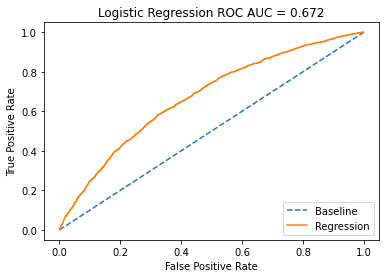

In [25]:
probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

**Гиперпараметры** — это внешние параметры для классификатора, которые не могут быть изучены самим классификатором и чаще всего задаются вручную. Логистическая регрессия, например, не способна сама выучить наилучшее значение для, например, параметра С.  В scikit-learn они передаются в качестве аргументов конструктору класса. Найдя оптимальные параметры, мы можем улучшить предсказательную силу нашей логистической регрессии.

Давайте найдем оптимальное значение параметра регуляризации для [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

В scikit-learn есть два общих подхода к поиску: с помощью [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  и [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). 

В этом примере мы рассмотрим поиск гиперпараметров GridSearchCV при помощи перебора параметров по сетке с последующей кросс-валидацией. 

In [27]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучшее Penalty: l2
Лучшее C: 1.0
